<a href="https://colab.research.google.com/github/kangdoung/CS114.K21/blob/master/Do_an_cuoi_ky_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import numpy as np
import pandas as pd
import cv2 #open cv
import os
import matplotlib.pyplot as plt


In [124]:
# scaling all images to 47 * 62 using OpenCV resize function
i = 0
for imgfolder in os.listdir('drive/My Drive/Image Processing/Train/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Train/' + imgfolder):
        filename = 'drive/My Drive/Image Processing/Train/' + imgfolder+ '/'+ filename
        img=cv2.imread(filename,0)
        img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [151]:
# building an array of images and finding its shape.
X_images = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Train/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Train/' + imgfolder):
        filename = 'drive/My Drive/Image Processing/Train/' + imgfolder + '/' + filename
        #print(filename)
        img = cv2.imread(filename,0)
        img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)
        X_images.append(img)
X_images = np.asarray(X_images)
X_images.shape

(1281, 67, 42)

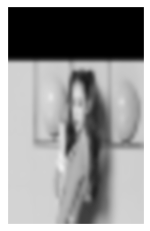

In [126]:
plt.imshow(X_images[20], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [152]:
y_train = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Train/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Train/' + imgfolder):
        y_train.append(imgfolder)
y_train = np.asarray(y_train)
y_train.shape

(1281,)

In [209]:
#Build array of images for Test/Validation dataset
X_test = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Val/'):
    i = 0
    for filename in os.listdir('drive/My Drive/Image Processing/Val/' + imgfolder):
         if(filename.endswith('.jpg')):
                filename = 'drive/My Drive/Image Processing/Val/' + imgfolder + '/' + filename
                #print(filename)
                img = cv2.imread(filename,0)
                
                img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)
                X_test.append(img)
                
                i+=1
    
X_test = np.asarray(X_test)
X_test.shape

(88, 67, 42)

In [210]:
#Building a 1D array of test labels
y_test = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Val/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Val/' + imgfolder):
        y_test.append(imgfolder)
y_test = np.asarray(y_test)
y_test.shape

(88,)

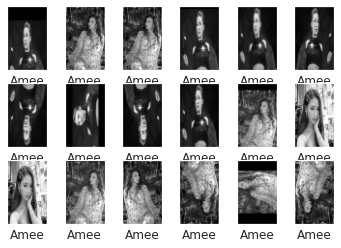

In [211]:
#display training images and labels to make sure they lineup correctly
%matplotlib inline
import seaborn as sns; sns.set()

fig,ax = plt.subplots(3,6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_images[i], cmap= 'gray')
    axis.set(xticks = [], yticks=[], xlabel=y_train[i])

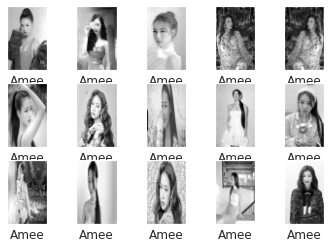

In [212]:
#display test images and labels to make sure they lineup correctly
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=y_test[i])

In [213]:
from sklearn.decomposition import PCA as RandomizedPCA

In [214]:
import warnings
warnings.filterwarnings("ignore")
# code for the SVC Face recognition example.
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

#extracting only 10 features out of 47*62 = 2914 features


pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [215]:
#flatten images.
X_data = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [216]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [217]:
# doing cross validation to tune the params of SVC

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_data, y_train)
print(grid.best_params_)

CPU times: user 1min 52s, sys: 20 s, total: 2min 12s
Wall time: 1min 17s
{'svc__C': 10, 'svc__gamma': 0.005}


In [218]:
grid.best_score_

0.4754286235408561

In [219]:
# pick the best model from the grid search above and use it to classify the test dataset
model = grid.best_estimator_
yfit = model.predict(X_test)

In [220]:
print(yfit)

['Amee' 'Amee' 'Amee' 'Amee' 'Amee' 'PMQ' 'HAT' 'PMQ' 'Amee' 'Amee' 'NDLN'
 'PMQ' 'HAT' 'Amee' 'Amee' 'Amee' 'MT' 'MT' 'MT' 'MT' 'MT' 'Amee' 'MT'
 'Amee' 'PMQ' 'MT' 'NDLN' 'PMQ' 'PMQ' 'Amee' 'MT' 'MT' 'HAT' 'PMQ' 'HAT'
 'NDLN' 'NDLN' 'NDLN' 'NDLN' 'NDLN' 'HAT' 'PMQ' 'NDLN' 'MT' 'Amee' 'NDLN'
 'NDLN' 'Amee' 'MT' 'MT' 'HAT' 'HAT' 'HAT' 'HAT' 'HAT' 'PMQ' 'HAT' 'Amee'
 'HAT' 'MT' 'PMQ' 'HAT' 'HAT' 'MT' 'MT' 'PMQ' 'Amee' 'Amee' 'HAT' 'Amee'
 'PMQ' 'PMQ' 'PMQ' 'HAT' 'Amee' 'MT' 'PMQ' 'PMQ' 'Amee' 'PMQ' 'HAT' 'Amee'
 'NDLN' 'MT' 'HAT' 'MT' 'HAT' 'MT']


In [221]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report

In [222]:
classification_report(yfit, y_test)

'              precision    recall  f1-score   support\n\n        Amee       0.62      0.45      0.53        22\n         HAT       0.50      0.53      0.51        19\n          MT       0.47      0.47      0.47        19\n        NDLN       0.53      0.73      0.62        11\n         PMQ       0.33      0.35      0.34        17\n\n    accuracy                           0.49        88\n   macro avg       0.49      0.51      0.49        88\nweighted avg       0.50      0.49      0.49        88\n'

In [223]:
accuracy_score(yfit, y_test)

0.48863636363636365